<a href="https://colab.research.google.com/github/ushanmukhareddy/finalproject/blob/main/finalproject5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# Define paths to dataset and YAML file
dataset_path = '/content/drive/MyDrive/BoneFractureYolo8'
yaml_file = '/content/drive/MyDrive/BoneFractureYolo8/data.yaml'

# Install YOLOv8 library
!pip install ultralytics

# Import the YOLO class
from ultralytics import YOLO

# Load a pre-trained YOLOv8 model. Here we use YOLOv8n (nano version).


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.3/886.3 kB 22.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
model = YOLO("yolov8n.pt")

# Train the model
model.train(
    data=yaml_file,        # Path to the YAML file on Google Drive
    epochs=30,             # Number of training epochs (adjust as needed)
    imgsz=640,             # Image size for training
    batch=16,              # Batch size (adjust based on GPU memory)
    name="bone_fracture_detection"
)

# Evaluate the model on the test set
results = model.val(data=yaml_file, split='test')

# Print out the mAP (mean Average Precision) score
print(f"Model Performance on Test Set - mAP@50: {results.results_dict['metrics/mAP50(B)']:.4f}")
print(f"Model Performance on Test Set - mAP@50-95: {results.results_dict['metrics/mAP50-95(B)']:.4f}")

# Calculate approximate accuracy based on mAP@50, often used as a proxy for accuracy
approx_accuracy = results.results_dict['metrics/mAP50(B)'] * 100
print(f"Approximate Model Accuracy on Test Set: {approx_accuracy:.2f}%")

# Run inference on a new image to visualize model predictions
image_path = "transverse_bone_fracture.jpg"  # Replace with actual path to an image for testing
predictions = model.predict(source=image_path, save=True)  # Set `save=True` to save the predictions
print("Predictions:", predictions)


100%|██████████| 6.25M/6.25M [00:00<00:00, 123MB/s]


Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/BoneFractureYolo8/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=bone_fracture_detection, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 25.6MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 97.7MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/BoneFractureYolo8/train/labels.cache... 3631 images, 1857 backgrounds, 0 corrupt: 100%|██████████| 3661/3661 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/BoneFractureYolo8/valid/labels.cache... 348 images, 175 backgrounds, 0 corrupt: 100%|██████████| 348/348 [00:00<?, ?it/s]


Plotting labels to runs/detect/bone_fracture_detection/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/bone_fracture_detection
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.16G      2.803      6.844       2.32         15        640: 100%|██████████| 229/229 [10:57<00:00,  2.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]

                   all        348        204      0.858     0.0139     0.0108    0.00297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.14G      2.502      5.157      2.087         10        640: 100%|██████████| 229/229 [01:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.56it/s]


                   all        348        204      0.238      0.043     0.0397     0.0122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.13G      2.474      4.194      2.116         13        640: 100%|██████████| 229/229 [01:27<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.77it/s]

                   all        348        204     0.0909     0.0686     0.0348    0.00878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.13G      2.397       3.85      2.071         13        640: 100%|██████████| 229/229 [01:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.58it/s]


                   all        348        204      0.197     0.0959     0.0588     0.0191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.14G       2.34      3.524       2.04         15        640: 100%|██████████| 229/229 [01:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]

                   all        348        204       0.23      0.113     0.0696     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.14G      2.316      3.357      2.032         12        640: 100%|██████████| 229/229 [01:27<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]


                   all        348        204      0.141      0.128     0.0854     0.0247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.14G      2.268      3.182      1.986         14        640: 100%|██████████| 229/229 [01:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.54it/s]

                   all        348        204      0.159      0.147      0.117     0.0453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.13G      2.212      3.012      1.965         16        640: 100%|██████████| 229/229 [01:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.91it/s]

                   all        348        204      0.222      0.155      0.136     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.16G      2.146       2.89      1.907          3        640: 100%|██████████| 229/229 [01:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]

                   all        348        204      0.177      0.201       0.14     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.14G       2.15      2.807      1.879         14        640: 100%|██████████| 229/229 [01:24<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        348        204      0.252      0.211      0.165      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.13G      2.117      2.722       1.87         28        640: 100%|██████████| 229/229 [01:25<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        348        204      0.247      0.242      0.189     0.0649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.14G      2.071      2.661      1.848         17        640: 100%|██████████| 229/229 [01:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.67it/s]

                   all        348        204      0.231      0.253      0.217     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.14G       2.02      2.536      1.809         11        640: 100%|██████████| 229/229 [01:27<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.73it/s]

                   all        348        204      0.468      0.197      0.209     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.14G      1.991      2.495      1.794         14        640: 100%|██████████| 229/229 [01:26<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]

                   all        348        204      0.313      0.283      0.227     0.0792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.13G      1.991      2.448      1.775         14        640: 100%|██████████| 229/229 [01:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.65it/s]


                   all        348        204      0.254      0.271      0.208     0.0779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.13G      1.918      2.311      1.739         11        640: 100%|██████████| 229/229 [01:26<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.34it/s]

                   all        348        204      0.305      0.273      0.242     0.0952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.16G      1.951      2.295      1.751         17        640: 100%|██████████| 229/229 [01:26<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]

                   all        348        204      0.285      0.313      0.242     0.0882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.16G      1.897      2.187      1.699         13        640: 100%|██████████| 229/229 [01:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.58it/s]

                   all        348        204       0.32      0.303      0.228     0.0819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.16G      1.873       2.11      1.683         11        640: 100%|██████████| 229/229 [01:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.75it/s]

                   all        348        204       0.28       0.26      0.249     0.0935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.15G      1.815      2.017      1.649         11        640: 100%|██████████| 229/229 [01:25<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.22it/s]

                   all        348        204      0.363      0.266      0.237     0.0939


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.14G      1.769      1.961      1.756          6        640: 100%|██████████| 229/229 [01:22<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]

                   all        348        204      0.358      0.272      0.225     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.14G      1.725      1.797      1.723         10        640: 100%|██████████| 229/229 [01:19<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.66it/s]

                   all        348        204      0.373      0.286      0.271     0.0967



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.14G       1.69      1.696      1.686          6        640: 100%|██████████| 229/229 [01:20<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.79it/s]

                   all        348        204      0.273      0.339      0.225     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.13G      1.644      1.618      1.656          6        640: 100%|██████████| 229/229 [01:23<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:02<00:00,  3.76it/s]

                   all        348        204      0.426      0.299      0.268     0.0895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.14G      1.609       1.54      1.622          9        640: 100%|██████████| 229/229 [01:22<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.28it/s]

                   all        348        204      0.348      0.312      0.268     0.0963



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.14G      1.573      1.443      1.592         10        640: 100%|██████████| 229/229 [01:19<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]

                   all        348        204      0.308       0.28      0.248     0.0903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.13G      1.541      1.404      1.566          3        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.63it/s]

                   all        348        204      0.302      0.316      0.266      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.13G      1.475      1.352      1.529          7        640: 100%|██████████| 229/229 [01:24<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  3.61it/s]

                   all        348        204      0.413      0.286      0.273      0.092



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.13G      1.474      1.313      1.522          6        640: 100%|██████████| 229/229 [01:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.31it/s]

                   all        348        204      0.372      0.314      0.271     0.0969



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.13G      1.438      1.268      1.488          6        640: 100%|██████████| 229/229 [01:19<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:03<00:00,  2.77it/s]

                   all        348        204      0.347      0.297      0.266     0.0936



30 epochs completed in 0.909 hours.
Optimizer stripped from runs/detect/bone_fracture_detection/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/bone_fracture_detection/weights/best.pt, 6.2MB

Validating runs/detect/bone_fracture_detection/weights/best.pt...
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]


                   all        348        204      0.301      0.316      0.266      0.102
        elbow positive         28         29     0.0923      0.103     0.0534     0.0134
      fingers positive         41         48      0.336      0.292      0.198      0.054
      forearm fracture         37         43      0.485      0.488       0.47      0.202
               humerus         31         36      0.393      0.556      0.482      0.188
     shoulder fracture         19         20      0.349      0.349      0.322      0.128
        wrist positive         17         28      0.147      0.107     0.0707     0.0271
Speed: 0.2ms preprocess, 2.8ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/bone_fracture_detection
Ultralytics 8.3.31 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/BoneFractureYolo8/test/labels.cache... 169 images, 86 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:12<00:00,  1.13s/it]


                   all        169         96      0.392      0.283      0.244     0.0741
        elbow positive         13         17     0.0985     0.0588     0.0425     0.0156
      fingers positive         22         27      0.189      0.148      0.144      0.035
      forearm fracture         13         14       0.82      0.328      0.438      0.128
               humerus         14         15      0.578      0.533       0.44      0.138
     shoulder fracture         15         17      0.247      0.294       0.16     0.0477
        wrist positive          6          6      0.418      0.333      0.238     0.0798
Speed: 0.6ms preprocess, 6.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/bone_fracture_detection2
Model Performance on Test Set - mAP@50: 0.2436
Model Performance on Test Set - mAP@50-95: 0.0741
Approximate Model Accuracy on Test Set: 24.36%

image 1/1 /content/transverse_bone_fracture.jpg: 320x640 (no detections), 56.6ms
Speed: 5.9ms pr

In [ ]:
from ultralytics import YOLO
import os

# Step 1: Load the trained YOLOv8 model
model = YOLO('best.pt')  # Replace with your model's path

# Step 2: Path to the image you want to run inference on
image_path = "fracture1.jpeg"  # Replace with your actual image path

# Step 3: Run inference on the image
results = model.predict(source=image_path)  # Run inference

# Step 4: Check for detections
if len(results[0].boxes) > 0:  # If any boxes are detected
    results[0].show()  # Show the image with bounding boxes
else:
    print("No detections found.")

# Step 5: Save the results (predicted image with bounding boxes)
results[0].save()  # This will save the annotated image with predictions to the default save directory

# Optional: Print out the predictions
for pred in results[0].boxes.data:  # Loop through each prediction
    class_id = int(pred[5])  # The predicted class ID
    confidence = pred[4].item()  # The confidence score
    bbox = pred[:4].cpu().numpy()  # The bounding box coordinates (x, y, width, height)
    print(f"Class ID: {class_id}, Confidence: {confidence:.4f}, Bounding Box: {bbox}")


image 1/1 /content/fracture1.jpeg: 640x640 2 forearm fractures, 1 humerus, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


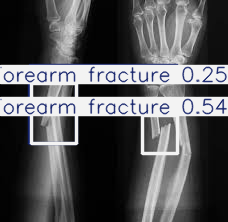

Class ID: 2, Confidence: 0.5355, Bounding Box: [     142.93      115.14      177.27      153.79]
Class ID: 2, Confidence: 0.2545, Bounding Box: [     31.201      83.226      76.584      143.81]
Class ID: 4, Confidence: 0.2509, Bounding Box: [     29.264      82.688      76.258      143.58]


In [3]:
from ultralytics import YOLO
import os

# Step 1: Load the trained YOLOv8 model
model = YOLO('best2.pt')  # Replace with your model's path

# Step 2: Path to the image you want to run inference on
image_path = "fracture1.jpeg"  # Replace with your actual image path

# Step 3: Run inference on the image
results = model.predict(source=image_path)  # Run inference

# Step 4: Check for detections
if len(results[0].boxes) > 0:  # If any boxes are detected
    results[0].show()  # Show the image with bounding boxes
else:
    print("No detections found.")

# Step 5: Save the results (predicted image with bounding boxes)
results[0].save()  # This will save the annotated image with predictions to the default save directory

# Optional: Print out the predictions
for pred in results[0].boxes.data:  # Loop through each prediction
    class_id = int(pred[5])  # The predicted class ID
    confidence = pred[4].item()  # The confidence score
    bbox = pred[:4].cpu().numpy()  # The bounding box coordinates (x, y, width, height)
    print(f"Class ID: {class_id}, Confidence: {confidence:.4f}, Bounding Box: {bbox}")


image 1/1 /content/fracture3.jpg: 512x640 1 elbow positive, 37.3ms
Speed: 2.5ms preprocess, 37.3ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


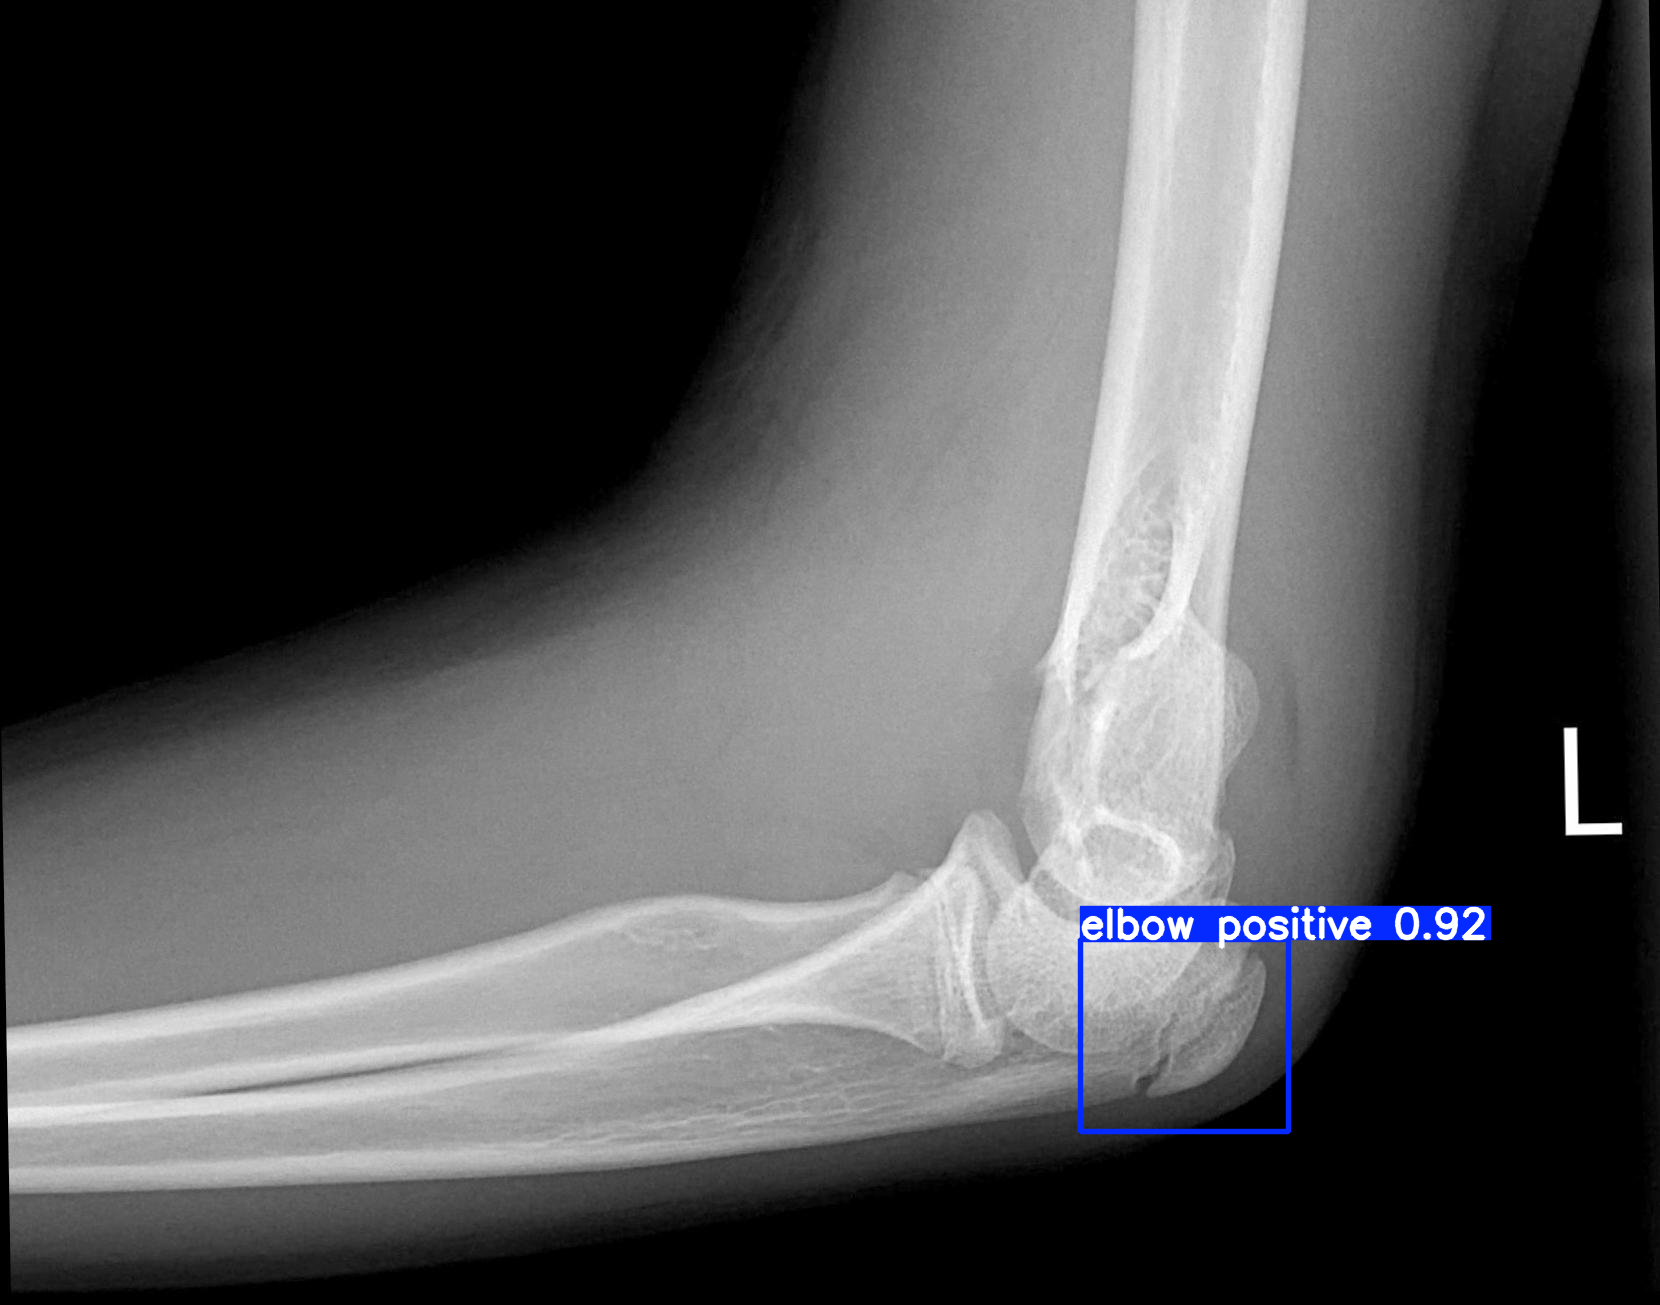

Class ID: 0, Confidence: 0.9179, Bounding Box: [     1080.3      939.31      1288.4      1131.9]


In [5]:
from ultralytics import YOLO
import os

# Step 1: Load the trained YOLOv8 model
model = YOLO('best2.pt')  # Replace with your model's path

# Step 2: Path to the image you want to run inference on
image_path = "fracture3.jpg"  # Replace with your actual image path

# Step 3: Run inference on the image
results = model.predict(source=image_path)  # Run inference

# Step 4: Check for detections
if len(results[0].boxes) > 0:  # If any boxes are detected
    results[0].show()  # Show the image with bounding boxes
else:
    print("No detections found.")

# Step 5: Save the results (predicted image with bounding boxes)
results[0].save()  # This will save the annotated image with predictions to the default save directory

# Optional: Print out the predictions
for pred in results[0].boxes.data:  # Loop through each prediction
    class_id = int(pred[5])  # The predicted class ID
    confidence = pred[4].item()  # The confidence score
    bbox = pred[:4].cpu().numpy()  # The bounding box coordinates (x, y, width, height)
    print(f"Class ID: {class_id}, Confidence: {confidence:.4f}, Bounding Box: {bbox}")

In [19]:
from ultralytics import YOLO
import os

# Step 1: Load the trained YOLOv8 model
model = YOLO('last2.pt')  # Replace with your model's path

# Step 2: Path to the image you want to run inference on
image_path = "fracture4.jpg"  # Replace with your actual image path

# Step 3: Run inference on the image
results = model.predict(source=image_path)  # Run inference

# Step 4: Check for detections
if len(results[0].boxes) > 0:  # If any boxes are detected
    results[0].show()  # Show the image with bounding boxes
else:
    print("No detections found.")

# Step 5: Save the results (predicted image with bounding boxes)
results[0].save()  # This will save the annotated image with predictions to the default save directory

# Optional: Print out the predictions
for pred in results[0].boxes.data:  # Loop through each prediction
    class_id = int(pred[5])  # The predicted class ID
    confidence = pred[4].item()  # The confidence score
    bbox = pred[:4].cpu().numpy()  # The bounding box coordinates (x, y, width, height)
    print(f"Class ID: {class_id}, Confidence: {confidence:.4f}, Bounding Box: {bbox}")


image 1/1 /content/fracture4.jpg: 384x640 (no detections), 7.0ms
Speed: 1.8ms preprocess, 7.0ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)
No detections found.


In [21]:
from ultralytics import YOLO
import os

# Step 1: Load the trained YOLOv8 model
model = YOLO('best.pt')  # Replace with your model's path

# Step 2: Path to the image you want to run inference on
image_path = "fracture7.png"  # Replace with your actual image path

# Step 3: Run inference on the image
results = model.predict(source=image_path)  # Run inference

# Step 4: Check for detections
if len(results[0].boxes) > 0:  # If any boxes are detected
    results[0].show()  # Show the image with bounding boxes
else:
    print("No detections found.")

# Step 5: Save the results (predicted image with bounding boxes)
results[0].save()  # This will save the annotated image with predictions to the default save directory

# Optional: Print out the predictions
for pred in results[0].boxes.data:  # Loop through each prediction
    class_id = int(pred[5])  # The predicted class ID
    confidence = pred[4].item()  # The confidence score
    bbox = pred[:4].cpu().numpy()  # The bounding box coordinates (x, y, width, height)
    print(f"Class ID: {class_id}, Confidence: {confidence:.4f}, Bounding Box: {bbox}")


image 1/1 /content/fracture7.png: 544x640 (no detections), 8.8ms
Speed: 2.9ms preprocess, 8.8ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 640)
No detections found.
